# Python introduction - session 4 
## Learning about the real power of python with modules
## Biopython, pandas, matplotlib and bedtools wrapped into the jupyter

If you get stuck in an endless loop hit the **"STOP" button (black square)** above or our good friend from bash, **ctrl+c**  
You know you are stuck in a loop if you see **In \[\*\]:** forever

### Installation reminder

If you want to install this whole tool stack on your own machine we recommend the following.

#### Windows

* Install the [Ubuntu subsystem](https://docs.microsoft.com/en-us/windows/wsl/install-win10)
* Install the Linux version of [Anaconda](https://www.anaconda.com/products/individual) into your subsystem.
* Setup [Bioconda](https://bioconda.github.io/) in your subsystem
* Install programs and modules like...

``conda install biopython``

#### Mac

* Install the Mac version of [Anaconda](https://www.anaconda.com/products/individual) on your command line/terminal.
* Setup [Bioconda](https://bioconda.github.io/) on your command line/terminal.
* Install programs and modules like...

``conda install biopython``

### Objectives

* Interogate larger dataset using biopython and pandas.
* Use pandas to combine larger datasets.
* Plot expression profiles across multiple condiditions in Arabidopsis.
* Extract promoter sequences of highly expressed genes.
* Analyze the composition of promoter sequences to identify motifs.

## Reminder: Python objects are like cats and dogs

In [1]:
%matplotlib inline
from IPython.display import Image

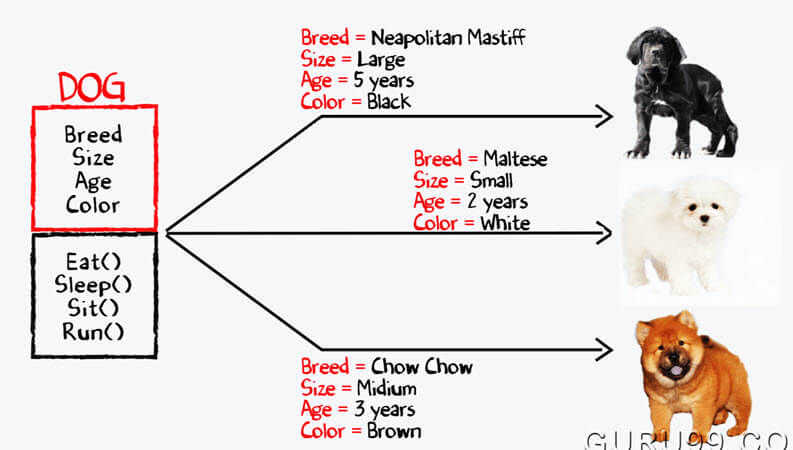

In [2]:
Image(filename='./figures/dogs_as_objects.jpg')

### Intro to [Biopython](https://biopython.org/wiki/Documentation)

* We will download the complete [Arabidopsis](https://www.arabidopsis.org/index.jsp) coding sequences.
* We will read them all in at once.
* We will translate them all into protein sequences.
* We will calcualte their pi values.
* We will do some basic plotting.

#### Let's download sequences from [here](https://www.arabidopsis.org/download/index-auto.jsp?dir=%2Fdownload_files%2FGenes%2FAraport11_genome_release%2FAraport11_blastsets)

In [ ]:
!wget https://www.arabidopsis.org/download_files/Genes/Araport11_genome_release/Araport11_blastsets/Araport11_genes.201606.cds.fasta.gz

In [ ]:
!gunzip Araport11_genes.201606.cds.fasta.gz

In [ ]:
!head Araport11_genes.201606.cds.fasta

## Let's reconstruct out lists from last time for all CDS in Arabidopsis

In [15]:
from Bio import SeqIO
from Bio.SeqUtils import IsoelectricPoint as IP
import pandas as pd

In [4]:
filename = 'Araport11_genes.201606.cds.fasta'

In [5]:
## Read in all CDS as list (ordered!)
arabidopsis_cds = []
for seq in SeqIO.parse(filename, 'fasta'):
    arabidopsis_cds.append(seq)    

In [6]:
###Let's make a cds length list and an ID list
cds_length = []
ID_list = []
for cds in arabidopsis_cds:
    cds_length.append(len(cds.seq))
    ID_list.append(cds.id)

In [10]:
###Let's make a protein list and a protein length list
arabidopsis_proteins = []
protein_length = []
for cds in arabidopsis_cds:
    tmp_protein = cds.translate() #translate sequence
    tmp_protein.id = cds.id #add id to tmp_protein object
    tmp_protein.name = cds.name #add name to tmp_protein object 
    tmp_protein.description = cds.description #add description to tmp_protein object
    arabidopsis_proteins.append(tmp_protein) #store it
    protein_length.append(len(tmp_protein)) #store length

In [13]:
protein_pi_values = []
for protein in arabidopsis_proteins:
    tmp_protein = IP.IsoelectricPoint(protein.seq) #generate a Isoelectric point object to be able to calcuate pi values
    tmp_protein_pi = tmp_protein.pi() #calculate pi value
    protein_pi_values.append(tmp_protein_pi)

## Exercise I

* Make a dictionary called ara_dict
* the keys 'Gene_ID', 'CDS_length', 'protein_length', 'protein_pi_value'
* the values are the corresponding lists we generated above

In [14]:
ara_dict = {}
ara_dict['Gene_ID'] = ID_list
ara_dict['CDS_length'] = cds_length
ara_dict['protein_length'] = protein_length
ara_dict['protein_pi_value'] = protein_pi_values

### Intro to [pandas](https://pandas.pydata.org/)

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. 

* We will generate a dataframe (Table) from our own input data
* We will subset the dataframe to find the longest and shortes CDS in Arabidopsis
* We will caclulate the mean, median, and standard deviation for our dataset
* We will do some basic plotting.
* We will load some public expression datasets.
* We will interogate this dataset.
* We will pull out the promoters of the most highly expressed genes and look for a specific hormone response elements.

#### The two main objects in pandas 

* Series to store one dimensional data
* Dataframe to store two dimnesional data

See for a quick intro [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

In [16]:
ara_df = pd.DataFrame.from_dict(ara_dict)

In [17]:
ara_df

,Gene_ID,CDS_length,protein_length,protein_pi_value
0,AT1G01010.1,1290,430,5.101379
1,AT1G01020.1,738,246,8.908997
2,AT1G01020.2,576,192,8.795715
3,AT1G01020.3,711,237,9.136292
4,AT1G01020.4,711,237,9.136292
...,...,...,...,...
48354,ATMG01350.1,438,146,4.690613
48355,ATMG01360.1,1584,528,7.786682
48356,ATMG01370.1,336,112,10.272400
48357,ATMG01400.1,318,106,10.078308


In [ ]:
## look at the top
ara_df.head()

In [ ]:
## look at the bottom
ara_df.tail()

In [ ]:
## Get the column index


In [18]:
ara_df.index

RangeIndex(start=0, stop=48359, step=1)

In [20]:
ara_df['Gene_ID']

Gene_ID
AT1G01010.1    AT1G01010.1
AT1G01020.1    AT1G01020.1
AT1G01020.2    AT1G01020.2
AT1G01020.3    AT1G01020.3
AT1G01020.4    AT1G01020.4
                  ...     
ATMG01350.1    ATMG01350.1
ATMG01360.1    ATMG01360.1
ATMG01370.1    ATMG01370.1
ATMG01400.1    ATMG01400.1
ATMG01410.1    ATMG01410.1
Name: Gene_ID, Length: 48359, dtype: object

In [21]:
ara_df.index = ara_df['Gene_ID']

In [22]:
ara_df.drop('Gene_ID', axis=1)

,CDS_length,protein_length,protein_pi_value
Gene_ID,,,
AT1G01010.1,1290,430,5.101379
AT1G01020.1,738,246,8.908997
AT1G01020.2,576,192,8.795715
AT1G01020.3,711,237,9.136292
AT1G01020.4,711,237,9.136292
...,...,...,...
ATMG01350.1,438,146,4.690613
ATMG01360.1,1584,528,7.786682
ATMG01370.1,336,112,10.272400


In [24]:
ara_df.drop('Gene_ID', axis=1, inplace = True)

### A word about pandas axis

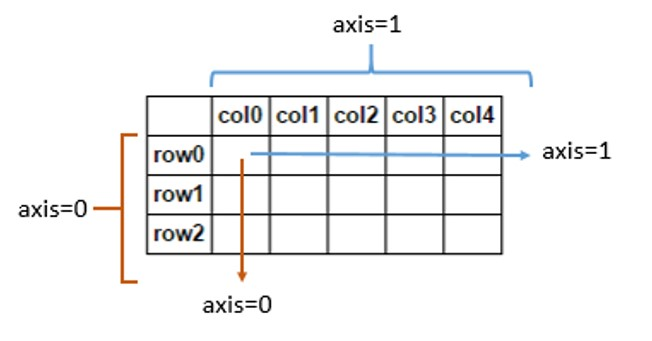

In [27]:
Image(filename='./figures/axis_pandas.jpg')

### Getting the mean, max, min, and such from a dataset

In [29]:
ara_df['CDS_length']

Gene_ID
AT1G01010.1    1290
AT1G01020.1     738
AT1G01020.2     576
AT1G01020.3     711
AT1G01020.4     711
               ... 
ATMG01350.1     438
ATMG01360.1    1584
ATMG01370.1     336
ATMG01400.1     318
ATMG01410.1     615
Name: CDS_length, Length: 48359, dtype: int64

### Exercise II

* Store the 3 sequence in a variable with the name third_cds

In [ ]:
third_cds = arabidopsis_cds[2]

In [ ]:
third_cds

### ...it's like a sequence dog....

A SeqRecord has several attributes such as

* a sequence -> access with .seq
* an id -> access with .id
* a name -> access with .name
* a description -> access with .description

... and many more as described here [SeqRecord](https://biopython.org/wiki/SeqRecord)

In [ ]:
third_cds

In [ ]:
print(third_cds)

In [ ]:
dir(third_cds)

### Let's access the different 'characteristics' (called attributes) of our SeqRecord

In [ ]:
###the sequence
third_cds.seq

In [ ]:
print(third_cds.seq)

In [ ]:
###the id
third_cds.id

In [ ]:
###the description
third_cds.description

In [ ]:
####reverse complement
third_cds.reverse_complement()

...it's like a sequnce dog...

### Exercise III

* How long is the sequence of the third_cds

In [ ]:
print('The lengths of the third cds is ', len(third_cds.seq), '.', sep='')

### Exercise  IV

* now let's make a length dictionary stores the length of all CDS in a dictionary.
* The keys of the dictionary will be the sequence ids and the vaules the lengths.
* BONUS. Print the name of the longest cds sequence.

In [ ]:
###Faded example
cds_length_dict = {}
for seq in arabidopsis_cds:
    cds_length_dict[seq.id] = len(seq.seq)

In [ ]:
max_length = max(cds_length_dict.values())

In [ ]:
for _id, length in cds_length_dict.items():
    if length == max_length:
        print("This is one of the longest Arabidopsis CDS sequences:", _id)
        print("It is this many bases long:", length)

### Exercise  V

* now let's make a list that stores the length of all CDS in order (sic!).


In [ ]:
###Let's make a cds lenght list as well for later.
###Faded example
cds_length = []
for seq in arabidopsis_cds:
    cds_length.append(len(seq.seq))

### Let's translate all the sequences and store them as protein sequences

We will use the [Seq](https://biopython.org/wiki/Seq) and [SeqRecord](https://biopython.org/wiki/SeqRecord) objects as a container to store these protein sequences.

...it's like a protein sequence dog...

In [ ]:
from Bio import SeqRecord, Seq

In [ ]:
third_cds.seq

Because we know that the third_cds sequence is a DNA sequence we know we can translate it.

In [ ]:
####translate
third_cds.seq.translate()

In [ ]:
###let's make a protein record for the third cds
third_protein = SeqRecord.SeqRecord(seq=third_cds.seq.translate())

In [ ]:
print(third_protein)

In [ ]:
third_protein.id = third_cds.id
third_protein.name = third_cds.name
third_protein.description = third_cds.description

In [ ]:
print(third_protein)

### Exercise IV

Let's make a list of all Arabidopsis protein sequences

In [ ]:
#### Faded example
arabidopsis_proteins = []
protein_length = []

for cds in arabidopsis_cds:
    tmp_protein = SeqRecord.SeqRecord(cds.seq.translate())
    tmp_protein.id = cds.id
    tmp_protein.name = cds.name
    tmp_protein.description = cds.description
    arabidopsis_proteins.append(tmp_protein)
    protein_length.append(len(tmp_protein.seq))

In [ ]:
###Quick checks are good
len(arabidopsis_proteins) == len(arabidopsis_cds)

### Let's see if there is a correlation between 

Some people find python plotting a bit awkward and it is still good to know the basics.

The basic python plotting is [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). More advanced for interactive figures and such is [Altair](https://altair-viz.github.io/) which is up and coming.

For now some starting plots in matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
?plt.scatter

In [ ]:
plt.scatter(protein_length, cds_length)

In [ ]:
plt.scatter(protein_length, cds_length)
plt.ylabel('CDS Length [bp]')
plt.xlabel('Protein Length [aa]')

In [ ]:
plt.hist(protein_length)

In [ ]:
plt.hist(protein_length, bins=500)

### Let's caclulate the [Isoelectric Point](https://en.wikipedia.org/wiki/Isoelectric_point) for all proteins 

The isoelectric point is the pH at which a peptide sequence has no charge.

We will makes use of the [SeqUtils](https://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html) using a specific dog idea (aka Class) called [IsoelectricPoint](https://biopython.org/DIST/docs/api/Bio.SeqUtils.IsoelectricPoint.IsoelectricPoint-class.html) to make these computations easier.

In [ ]:
from Bio.SeqUtils import IsoelectricPoint as IP

In [ ]:
?IP

In [ ]:
#### third_protein
third_protein.seq

In [ ]:
protein = IP.IsoelectricPoint(third_protein.seq)

...it's like a sequnce dog...

In [ ]:
###calculate the pi
protein.pi()

In [ ]:
####calculate the charge at a certain 
protein.charge_at_pH(10)

### Exercise VII

* Let's make a list of all the pi values of all proteins.
* Plot the pi distribution of all proteins in Arabidopsis.
* Explain the observed distribution

In [ ]:
#### Faded example
protein_pi_values = []
for protein in arabidopsis_proteins:
    tmp_protein = IP.IsoelectricPoint(protein.seq)
    tmp_protein_pi = tmp_protein.pi()
    protein_pi_values.append(tmp_protein_pi)

In [ ]:
#### Plot the distribution of pi values of all arabidopsis proteins
plt.hist(protein_pi_values, bins = 100)
plt.xlabel('pi [pH]')

### Exercise VIII

* look at the relationship between protein length and pI values



In [ ]:
plt.scatter(protein_length, protein_pi_values, alpha=0.2)

The problem here is that too many points are overlapping and we would need to do some summary statistics while plotting.

### Seaborn to the rescue!

Let's do some density plots looking at both [distributions](https://seaborn.pydata.org/tutorial/distributions.html) at once.

In [ ]:
import seaborn as sns

In [ ]:
sns.kdeplot(protein_length, protein_pi_values)

In [ ]:
sns.jointplot(protein_length, protein_pi_values, kind='hex', color = 'g')